Which country is the happiest in the world?<br>2019: Finland<br>
2018: Finland<br>
2017: Norway<br>
2016: Denmark<br>
2015: Switzerland<br><br>
What are the most important contributing factors to a nation’s happiness?<br> 1)GDP per capita<br> 2)Social Support/Family<br> 3)Healthy life expectancy<br> 4)Freedom<br><br>
Is overall happiness increasing or decreasing? <br> Decreasing between 2015-2017, increasing after 2017.

In [143]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
#dataset is from https://www.kaggle.com/datasets/unsdsn/world-happiness?resource=download&select=2017.csv
db_2015 = pd.read_csv('2015.csv')
db_2016 = pd.read_csv('2016.csv')
db_2017 = pd.read_csv('2017.csv')
db_2018 = pd.read_csv('2018.csv')
db_2019 = pd.read_csv('2019.csv')
db = [db_2019, db_2018, db_2017, db_2016, db_2015]
year = ['2019', '2018', '2017', '2016', '2015']
score = ['Score', 'Score', 'Happiness.Score', 'Happiness Score', 'Happiness Score']
for i,y,s in zip(db, year, score):
    country_str = [country for country in list(i.keys()) if country.startswith('Country')]
    print(y + ': ' + i[country_str[0]][0])
    print('Overall happiness: ' + str(i[s].sum().round(3))+'\n')

2019: Finland
Overall happiness: 843.507

2018: Finland
Overall happiness: 838.643

2017: Norway
Overall happiness: 829.873

2016: Denmark
Overall happiness: 845.003

2015: Switzerland
Overall happiness: 849.366



In [145]:
def graph_happ_cont(cont_name, col):
    plt.figure(figsize =(10,10))
    plt.style.use('seaborn')
    def graph_year(index):
        plt.ylabel('Happiness')
        sns.regplot(x = score[index], y = col[index], data = db[index])
        slope, intercept = np.polyfit(db[index][score[index]],db[index][col[index]],1)
        return slope
        
    infos = []
    for index in range(len(db)) :
        infos.append(graph_year(index))
    
    print('Slope (as a measure of contribution): ' + str(np.mean(infos).round(3)))
    plt.ylabel(cont_name)
    plt.legend(year, loc='upper left', prop={'size': 12})
    plt.show()
    plt.clf()

Slope (as a measure of contribution): 0.286


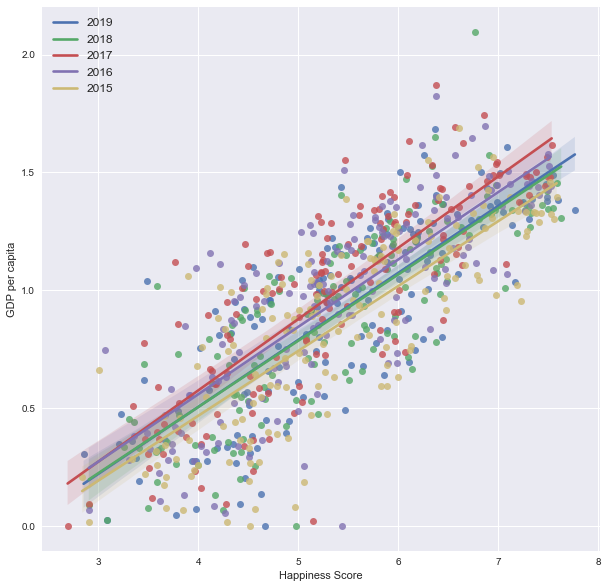

<Figure size 576x396 with 0 Axes>

In [146]:
graph_happ_cont('GDP per capita', ['GDP per capita', 'GDP per capita', 'Economy..GDP.per.Capita.', 'Economy (GDP per Capita)', 'Economy (GDP per Capita)'])

Slope (as a measure of contribution): 0.075


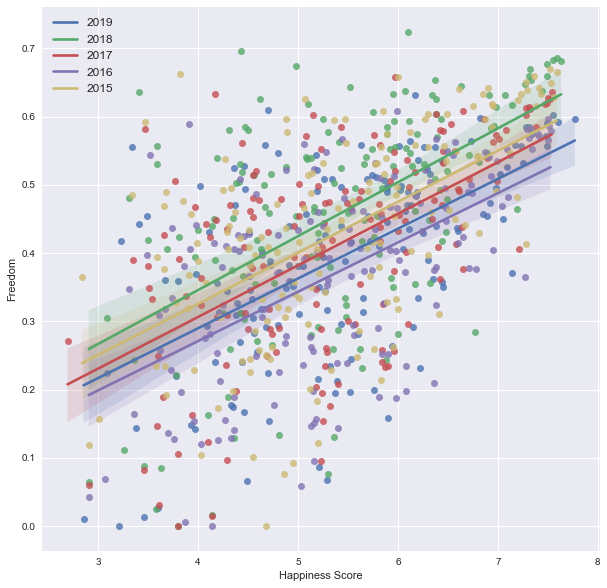

<Figure size 576x396 with 0 Axes>

In [147]:
graph_happ_cont('Freedom', ['Freedom to make life choices','Freedom to make life choices','Freedom','Freedom','Freedom'] )

Slope (as a measure of contribution): 0.163


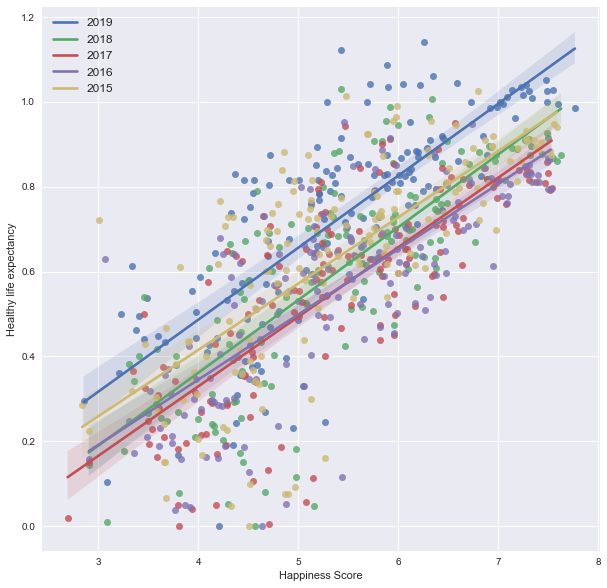

<Figure size 576x396 with 0 Axes>

In [148]:
graph_happ_cont('Healthy life expectancy', ['Healthy life expectancy', 'Healthy life expectancy', 'Health..Life.Expectancy.', 'Health (Life Expectancy)', 'Health (Life Expectancy)'])

Slope (as a measure of contribution): 0.19


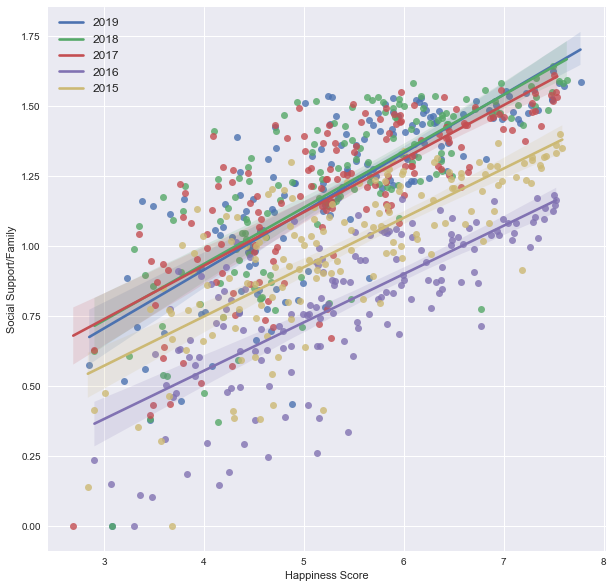

<Figure size 576x396 with 0 Axes>

In [149]:
graph_happ_cont('Social Support/Family',['Social support', 'Social support', 'Family', 'Family', 'Family'])